# 1.0 Importing Python Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
import warnings
warnings.filterwarnings("ignore")


# 1.1 Importing the dataset

In [2]:
#creating a dataframe and naming it insurance
insurance=pd.read_csv('insurance.csv')
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# 1.2 EDA

In [3]:
insurance.shape

(1338, 7)

In [4]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
#summary statistics for numeric columns
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### From our EDA we can observe that the target variable(charges) is numerical continuous,we'll therefore use a regression model to perform predictive analysis

# 1.4 Visualizing the distribution of the age column


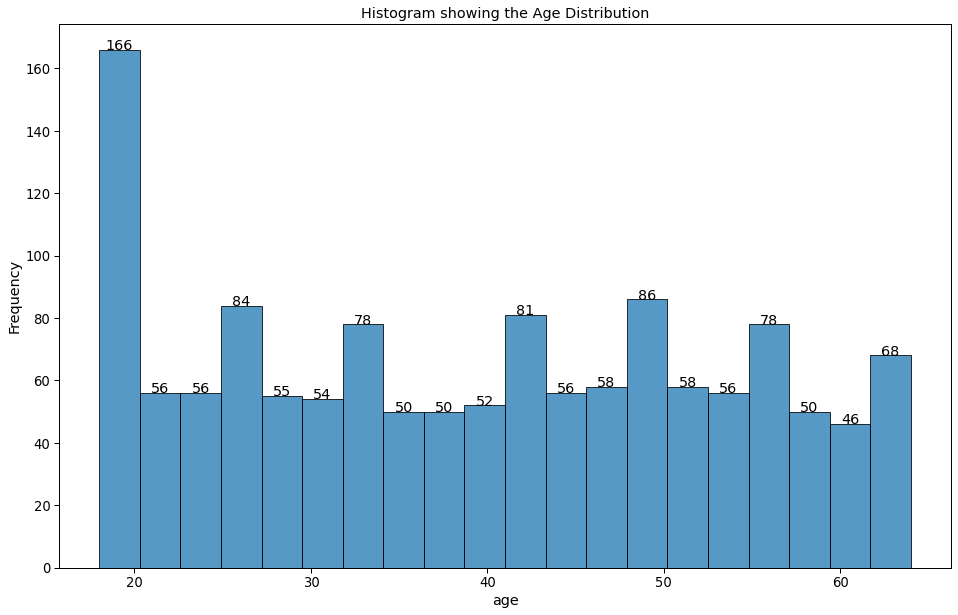

In [6]:
#plotting a histogram for the age column
plt.figure(figsize=(16,10))
sns.set_context("paper",font_scale=1.5)
ax=sns.histplot(data=insurance,x='age',palette='bone',bins=20)
for p in ax.patches:
    height = p.get_height()
    if np.isnan(height):
        height=0
    ax.text(p.get_x()+p.get_width()/2., height, '{:1.0f}'.format(height), ha="center")
    
plt.ylabel("Frequency")    
plt.title("Histogram showing the Age Distribution")
plt.show()

### We can observe that the age bracket that has a majority of clients is between 18-20 years.


# 1.5 Isolating Numerical continuous and numerical discrete columns

In [7]:
#slicing numeric columns only
numeric_cols=insurance.select_dtypes('number')
numeric_cols

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520
...,...,...,...,...
1333,50,30.970,3,10600.54830
1334,18,31.920,0,2205.98080
1335,18,36.850,0,1629.83350
1336,21,25.800,0,2007.94500


In [8]:
# droping the target column charges
numeric_cols.drop('charges',axis=1)

,age,bmi,children
0,19,27.900,0
1,18,33.770,1
2,28,33.000,3
3,33,22.705,0
4,32,28.880,0
...,...,...,...
1333,50,30.970,3
1334,18,31.920,0
1335,18,36.850,0
1336,21,25.800,0


In [11]:
#we have four numeric columns we'll therefore use nunique to identify if it is continuous or discrete
numerical_continuous=[]
numerical_discrete=[]
for i in numeric_cols.columns:
    if numeric_cols[i].nunique() >=10:
        numerical_continuous.append(i)
        continue
    elif numeric_cols[i].nunique()<10:
        numerical_discrete.append(i)
numerical_continuous.remove('charges')         
        

In [12]:
numerical_continuous

['age', 'bmi']

In [13]:
numerical_discrete

['children']

# 1.6 Identifying outliers in numeric continuous columns and resolving them using z score

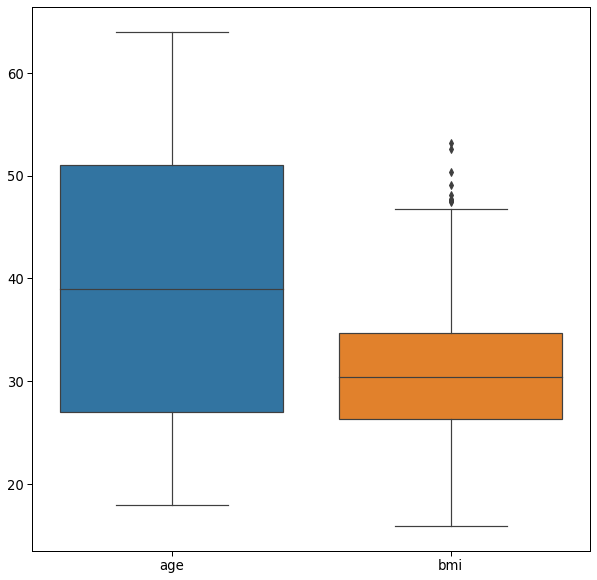

In [14]:
#we'll use a box plot to identify outliers in the columns
plt.figure(figsize=(10,10))
sns.set_context("paper",font_scale=1.5)
sns.boxplot(data=insurance[numerical_continuous])
plt.show()

In [15]:
# From the summary statistics of the bmi,the mean is 30 and the std is 6
# Given that the outliers are above 47,
# The zscore threshold chosen is 2 standard deviations above the mean
from scipy import stats
zscore = np.abs(stats.zscore(insurance['bmi']))
zscore

0       0.453320
1       0.509621
2       0.383307
3       1.305531
4       0.292556
          ...   
1333    0.050297
1334    0.206139
1335    1.014878
1336    0.797813
1337    0.261388
Name: bmi, Length: 1338, dtype: float64

In [16]:
#using the threshold of 2 to identify the location of the outliers
threshold = 2
print(np.where(zscore>2))

(array([  28,  116,  128,  172,  198,  232,  250,  286,  292,  356,  380,
        383,  401,  410,  412,  428,  438,  442,  454,  493,  521,  543,
        547,  549,  563,  572,  582,  660,  674,  680,  701,  796,  811,
        821,  847,  860,  867,  895,  930,  941,  950,  951, 1024, 1029,
       1047, 1074, 1085, 1088, 1131, 1133, 1156, 1205, 1226, 1286, 1312,
       1317, 1332]),)


In [17]:
#removing the outliers
insurance_no_outliers = insurance
insurance_no_outliers = insurance_no_outliers[(zscore<2)]

In [18]:
insurance_no_outliers.shape

(1281, 7)

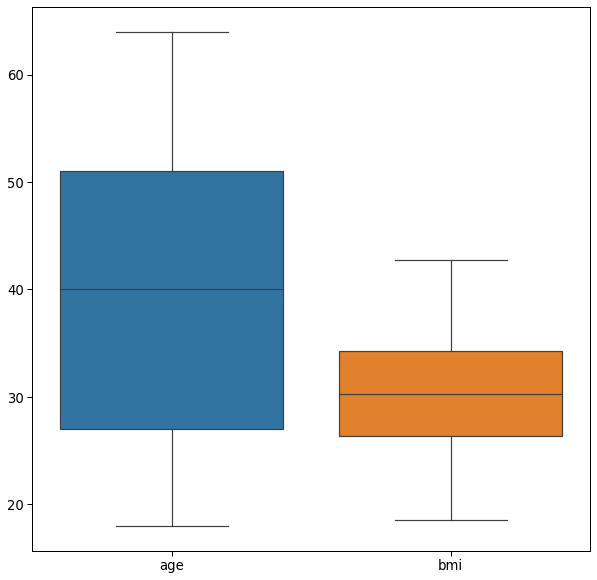

In [19]:
#plotting the data again to check if the outliers have been removed 
plt.figure(figsize=(10,10))
sns.set_context("paper",font_scale=1.5)
sns.boxplot(data=insurance_no_outliers[numerical_continuous])
plt.show()

# 1.7 Isolating Categorical Columns

In [20]:
categorical=[]
for i in insurance.columns:
     if insurance[i].dtypes == 'object':
        categorical.append(i)
categorical

['sex', 'smoker', 'region']

# 1.8 Visually Identifying outliers in discrete and categorical columns and resolving them using rare levels method¶

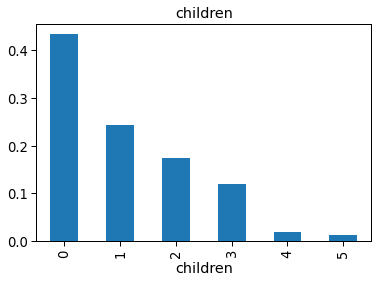

0    0.433255
1    0.241998
2    0.173302
3    0.119438
4    0.019516
5    0.012490
Name: children, dtype: float64


In [21]:
#Outliers in discrete variables
for i in numerical_discrete:
    (insurance_no_outliers.groupby(i)[i].count() / np.float(len(insurance_no_outliers))).plot.bar()
    plt.title(i)
    plt.show()
    print(insurance_no_outliers[i].value_counts() / np.float(len(insurance_no_outliers)))

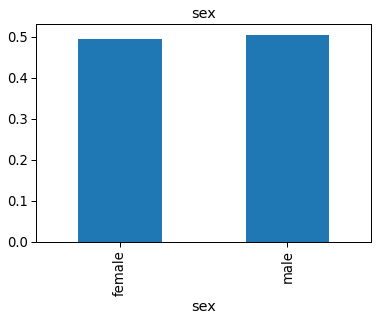

male      0.505074
female    0.494926
Name: sex, dtype: float64


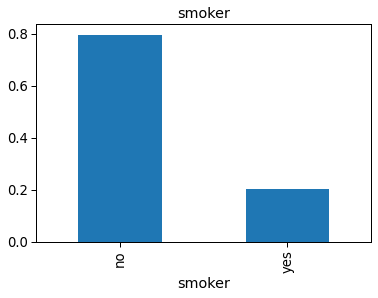

no     0.796253
yes    0.203747
Name: smoker, dtype: float64


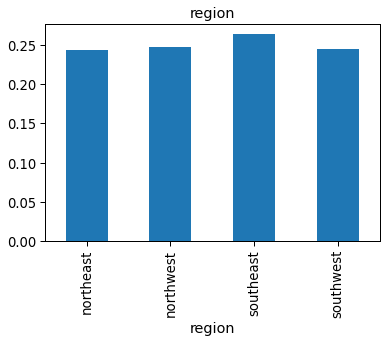

southeast    0.263856
northwest    0.247463
southwest    0.245121
northeast    0.243560
Name: region, dtype: float64


In [22]:
#outliers in categorical variables
for i in categorical:
    (insurance_no_outliers.groupby(i)[i].count() / np.float(len(insurance_no_outliers))).plot.bar()
    plt.title(i)
    plt.show()
    print(insurance_no_outliers[i].value_counts() / np.float(len(insurance_no_outliers)))

In [23]:
#In the categorical data we do not have values that are present in less than 2% of the data
#In the children's column we have we have two values that present in less than 2% of our data 
#we'll use the rare levels method to remove them
insurance_no_outliers['children'] = insurance_no_outliers['children'].replace([4, 5], 'Rare')


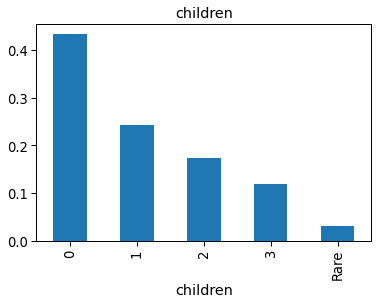

0       0.433255
1       0.241998
2       0.173302
3       0.119438
Rare    0.032006
Name: children, dtype: float64


In [24]:
#plotting the data again to check if the values were replaced by rare
for i in numerical_discrete:
    (insurance_no_outliers.groupby(i)[i].count() / np.float(len(insurance_no_outliers))).plot.bar()
    plt.title(i)
    plt.show()
    print(insurance_no_outliers[i].value_counts() / np.float(len(insurance_no_outliers)))

# 1.9 Encoding discrete and Categorical features using measures of central tendency

In [25]:
#we'll use target encoding to encode our variables using the mean
def encoding_variables(col, target):
        ordered_labels = insurance_no_outliers.groupby([col])[target].mean().to_dict()
        insurance_no_outliers[col] = insurance_no_outliers[col].map(ordered_labels)


In [26]:
for col in categorical:
    encoding_variables(col, 'charges')


In [27]:
for col in numerical_discrete:
    encoding_variables(col, 'charges')

In [28]:
insurance_no_outliers

,age,sex,bmi,children,smoker,region,charges
0,19,12429.505375,27.900,12324.348977,31846.616835,12340.480789,16884.92400
1,18,14075.813874,33.770,12904.081811,8505.285285,14532.869080,1725.55230
2,28,14075.813874,33.000,15540.082132,8505.285285,14532.869080,4449.46200
3,33,14075.813874,22.705,12324.348977,8505.285285,12507.216229,21984.47061
4,32,14075.813874,28.880,12324.348977,8505.285285,12507.216229,3866.85520
...,...,...,...,...,...,...,...
1333,50,14075.813874,30.970,15540.082132,8505.285285,12507.216229,10600.54830
1334,18,12429.505375,31.920,12324.348977,8505.285285,13575.479882,2205.98080
1335,18,12429.505375,36.850,12324.348977,8505.285285,14532.869080,1629.83350
1336,21,12429.505375,25.800,12324.348977,8505.285285,12340.480789,2007.94500


### The data has been target encoded using the mean

# 1.10 Seperating feature and target columns and narrowing the data to 5 features

In [29]:
#features
X = insurance_no_outliers.drop('charges', axis = 1)
#target
y = insurance_no_outliers['charges']

In [30]:
X.head()

,age,sex,bmi,children,smoker,region
0,19,12429.505375,27.900,12324.348977,31846.616835,12340.480789
1,18,14075.813874,33.770,12904.081811,8505.285285,14532.869080
2,28,14075.813874,33.000,15540.082132,8505.285285,14532.869080
3,33,14075.813874,22.705,12324.348977,8505.285285,12507.216229
4,32,14075.813874,28.880,12324.348977,8505.285285,12507.216229


In [31]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

model = LinearRegression()
#Initializing RFE model
rfe = RFE(model,n_features_to_select=5 )
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)
cols = list(X.columns)
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['age', 'bmi', 'children', 'smoker', 'region'], dtype='object')


### The sex column has been dropped 

# 1.11 Converting target labels to log values

In [33]:
y=(y+1).transform(np.log)
y

0        9.734236
1        7.453882
2        8.400763
3        9.998137
4        8.260455
          ...    
1333     9.268755
1334     7.699381
1335     7.396847
1336     7.605365
1337    10.279948
Name: charges, Length: 1281, dtype: float64

### It is important to convert the target column to their log values because this will narrow down the values   therefore reduce outliers

# 1.12 Normalizing and splitting the data to train and test sets

In [34]:
#normalizing the data using the MinMaxScaler
minmax_scaler = MinMaxScaler()
for i in X.columns:
    X[i]=minmax_scaler.fit_transform(X[[i]])


In [35]:
X.head()

,age,sex,bmi,children,smoker,region
0,0.021739,0.0,0.387629,0.19775,1.0,0.000000
1,0.000000,1.0,0.629691,0.34238,0.0,1.000000
2,0.217391,1.0,0.597938,1.00000,0.0,1.000000
3,0.326087,1.0,0.173402,0.19775,0.0,0.076052
4,0.304348,1.0,0.428041,0.19775,0.0,0.076052


In [36]:
#splitting the data to train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_rfe, y,random_state=0)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((960, 5), (321, 5), (960,), (321,))

# 1.13 Using at least 4 different regression based machine learning methods and use the training and testing cross accuracy and divergence to identify the best model.

In [37]:
#importing the models
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import ElasticNet

random_forest= RandomForestRegressor(random_state=0)
decision_tree=DecisionTreeRegressor(random_state=0)
bagging=BaggingRegressor(random_state=0)
elastic_net=ElasticNet(random_state=0)

#placing our models in dict 
models={' RandomForestRegressor':random_forest,
        'DecisionTreeRegressor':decision_tree,
        'BaggingRegressor':bagging,
        'ElasticNet':elastic_net}

In [38]:
#function to help in cross validation
from sklearn.model_selection import cross_val_score
for name,model in models.items():
    scores=cross_val_score(model,X,y,cv=5)
    print(model)
    print(f'validation mean score:{np.mean(scores)}')
    print(f'validation std:{np.std(scores)}')
    print('/n')

RandomForestRegressor(random_state=0)
validation mean score:0.7906352610451785
validation std:0.059535162509695386
/n
DecisionTreeRegressor(random_state=0)
validation mean score:0.6432276452094253
validation std:0.09284201476486317
/n
BaggingRegressor(random_state=0)
validation mean score:0.7740116294821003
validation std:0.05014535072623682
/n
ElasticNet(random_state=0)
validation mean score:-0.0012465696197756504
validation std:0.00123102259470417
/n


### We'll use the random forest regressor as it has the highest accuracy


In [39]:
random_forest.fit(X_train,y_train)

RandomForestRegressor(random_state=0)

# After identifying the best model, train it with the training data again. Using at least 3 model evaluation metrics in regression, evaluate the models training and testing score

In [40]:
#Evaluation
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
def model_evaluation(model,X,y):
    y_predict=np.exp(model.predict(X))
    y=np.exp(y)
    print(f'Squared error:{mean_squared_error(y,y_predict)}')
    print(f'absolute error:{mean_absolute_error(y,y_predict)}')
    print(f'R2_score:{r2_score(y,y_predict)}')
          


In [41]:
#calling the fxn
model_evaluation(random_forest,X_train,y_train)

Squared error:5670025.422771975
absolute error:1022.572210519004
R2_score:0.9613455840009262


In [42]:
model_evaluation(random_forest,X_test,y_test)

Squared error:22592892.345032178
absolute error:2350.4410323484726
R2_score:0.8304967877217132
